In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))

2.14.0
11490434/11490434 [==============================] - 0s 0us/step
60000


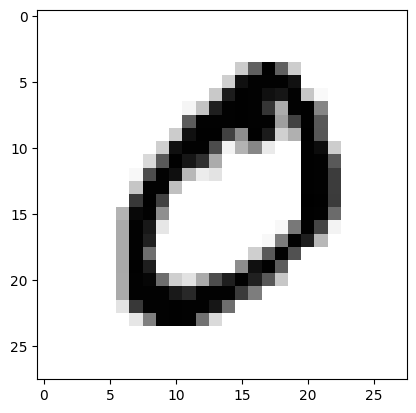

0


In [ ]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

print(y_train[1])

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0
print(np.min(x_train_norm), np.max(x_train_norm))

0.0 1.0


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=500, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

In [ ]:
print(x_train_norm.shape)
print(x_test_norm.shape)
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
model.fit(x_train_reshaped, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 71s 37ms/step - loss: 0.1290 - accuracy: 0.9591 - val_loss: 6.2425 - val_accuracy: 0.9865
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0520 - accuracy: 0.9839 - val_loss: 6.9243 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 4.2255 - val_accuracy: 0.9912
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 4.6259 - val_accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 4.8002 - val_accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 6.1844 - val_accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0197 - accuracy: 0.9934 - val_loss: 4.6591 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score[1])

0.9926999807357788
